# Компьютерные технологии в науке и образовании

## Домашнее задание week1

___

### НПМмд-01-19

#### Студент: Мухамаду Хади Диалло (1032195419@rudn.ru)

#### Преподаватель: Попов Владимир Алексеевич (popov-va@rudn.ru)


_______

## Написать программы:
## 1. С клавиатуры вводится целое число. Программа должна вывести в консоль(команда print() ) слово 'Yes' - если число чётное и 'No'- если число нечётное.
## НЕ использовать циклы, условные оператор, а только операции с целыми числами, канкатенацию строк и повторение n раз, а также ввод целых чисел с клавиатуры!

In [4]:
n=int(input('Enter an integer: '))
verify=n%2
print('result : Yes'*(1-verify)+'result : No'*verify)

Enter an integer: 277
result : No


## 2. С клавиатуры вводятся 2 целых числа. Программа должна вывести в консоль(команда print() ) слово 'Yes' - если первое число делится без остатка на второе число и 'No'- если не делится без остатка.

In [32]:
n1=int(input('Enter a first integer n1= '))
n2=int(input('Enter a second integer n2= '))
rest=n1%n2

verify=int(round((rest/(1+rest)),0))
print("result : Yes "*(1-verify)+"result : No"*verify)

Enter a first integer n1= 1992
Enter a second integer n2= 7
result : No


## 5. Реализовать метод Ньютона в виде функции с аргументами: функция f, начальное приближение x_0, либо точность либо количество итераций либо гибрид. Обязательно использовать библиотеки sympy, matplotlib

In [16]:
from sympy import solve, Eq,lambdify, init_printing, Derivative, diff
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [98]:
# define expression 
x,y,t,z=sp.symbols('x,y,t,z')
expr_1=x**2+2*x+1
expr_1

In [28]:
# define function f
f = lambdify(x, expr_1 , "numpy")
f(0)

In [12]:
# roots equation 
roots=solve(expr_1,x)
roots

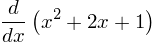

In [20]:
## derivative 
f_dash_expr=Derivative(expr_1,x,1) ## expr_1.diff(x, 1)
f_dash_expr

In [26]:
## f dash
f_dash=f_dash_expr.doit()
f_dash

In [59]:
type(f_dash)

sympy.core.add.Add

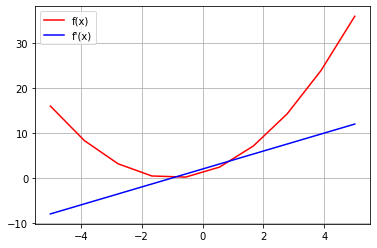

In [62]:
# graphics
x_points=np.linspace(-5,5,10)
plt.plot(x_points, f(x_points),c='red', label="f(x)")
#plt.plot(x_points, f_dash(x_points),c='blue', label="f'(x)")
plt.plot(x_points, 2*x_points+2,c='blue', label="f'(x)")
plt.grid()
plt.legend()
plt.show()

#### метод Ньютона в виде функции с аргументами

In [52]:
def NewtonRoot(g,x0=1,nb_iter=100) :
    
    g_diff=lambda t: sp.diff(f(x),x).evalf(subs={x:t})
    
    # newton algorithm
    for i in range(1,nb_iter+1) :
        x0=x0-g(x0)/g_diff(x0)
        if (i==nb_iter) :
            return round(x0,5)

In [55]:
print('x0=', NewtonRoot(f),' f(x)=',f(NewtonRoot(f)))

x0= -1.0  f(x)= 0.0


# 6) Найти H длину высоты, опущенной из вершины  $A_4$ на грань $A_1A_2A_3$

In [66]:
# points
A_1 = np.array([-2, -2, -6])
A_2 = np.array([2, -5, 0])
A_3 = np.array([-1, 4, -9])
A_4 = np.array([0, 3, 0])

# vectors
A12= A_2 - A_1
A13= A_3 - A_1
A23 = A_3 - A_2
A24 = A_4 - A_2

# normal vectors 
n1 = np.cross(A12, A13) # plan A1A2A3
n2 = np.cross(A23, A24) # plan A2A3A4
print('n1= ',n1, '\n' 'n2= ',n2)

n1=  [-27  18  27] 
n2=  [72 18 -6]


H is the distance between the point $A_4$ and the plane $A_1 A_2 A_3$ : 

$H=\frac{|\vec{n1}.\vec{A_1A_4}|}{||\overrightarrow{n1}||}$

In [69]:
A14=A_4-A_1
H=abs(np.dot(n1, A14))/np.sqrt((np.dot(n1, n1)))
print("H длину высоты =",round(H,5))

H длину высоты = 4.69042


# 7) Координаты точки $A_5$ симметричной $A_4$ относительно грани $A_1A_2A_3$

$H=\frac{|\vec{n1}.\vec{A_1A_4}|}{||\overrightarrow{n1}||}=\frac{|\vec{n1}.\vec{A_1A_5}|}{||\overrightarrow{n1}||}$

therefore $A_4A_1^2=A_5A_1^2$, $\vec{A_4A_1}=-\vec{A_5A_1}$

In [77]:
A41=A_1-A_4
A_5=A41-A_1
print('Координаты точки  𝐴5 =',A_5)

Координаты точки  𝐴5 = [ 0 -3  0]


# 8) Координаты точки $A_6$ симметричной $A_4$ относительно прямой $A_2A_3$


$\vec{A_4A_6}.\vec{A_2A_3}=0$

Let $A_6=(x,y,t)$

In [82]:
A_6=np.array([x,y,t])
A46=A_6-A_4
expr=np.cross(A46,A23)

equations = [
    sp.Eq( expr[0], 0),
    sp.Eq( expr[1], 0),
    sp.Eq(expr[2],0)
]
equations

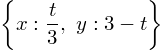

In [99]:
A6=sp.solve(equations,[x,y,t])
A6

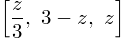

In [100]:
t=z
A_6=[t/3,3-t,t]
A_6

In [102]:
A46=A_6-A_4
expr=np.dot(A46,A23)
expr
solve(sp.Eq(expr,0))

# 9) Найти расстояние $D_1$  между точкой $A_4$ и прямой $A_2A_3$

The projection of the vector u onto v is the vector :  
#### $proj_vu=\frac{u.v}{v^2}.v$
Therefore, the distance between a point $A_4$ to a line passing through the points $A_2$, $A_3$ is :

#### $D_1=|\vec{u}-proj_v\vec{u}|$, where $A_4A_2=u$ and $A_2A_3=v$

In [105]:
A42=A_2-A_4
A23=A_3-A_2
projection=(np.dot(A42,A23)/np.dot(A23,A23)**2)*A23
D_1=np.sqrt(np.dot(A42-projection,A42-projection))

print("Distance D1=",round(D_1,2))

Distance D1= 8.22


# 10) Найти расстояние $D_2$  между рёбрами $A_1A_3$ и прямой $A_2A_4$

We apply the same formula as question 9), w'll have the minimum distance

In [107]:
A12=A_2-A_1
A24=A_4-A_2
projection=(np.dot(A12,A24)/np.dot(A24,A24)**2)*A24
D_2=np.sqrt(np.dot(A12-projection,A12-projection))

print("Distance D2=",round(D_2,2))

Distance D2= 7.78


# 11) Найти радиус и координаты центра шара, описанного вокруг пирамиды

Let M be the unknown point belonging to the ball, and $R$ be the radius,  

and $O$ be the center. then
$M=(x,y,z)$, $O=(x_O,y_0,z_0)$. The ball verify : $OM=R$

In [110]:
x0,y0,z0,R=sp.symbols("x0,y0,z0,R")
sph_eq=sp.Eq((x-x0)**2+(y-y0)**2+(z-z0)**2,R**2)
sph_eq

All the pyramidal points $A_1,A_2,A_3,A_4$ must verify this equation,  

therefore, we can find our four unknowns $(x_O,y_0,z_0, R)$

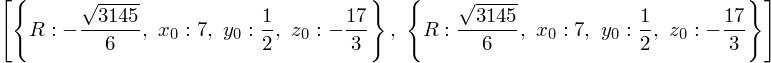

In [114]:
syst_eq=[ sp.Eq((A_1[0]-x0)**2+(A_1[1]-y0)**2+(A_1[2]-z0)**2,R**2),
         sp.Eq((A_2[0]-x0)**2+(A_2[1]-y0)**2+(A_2[2]-z0)**2,R**2),
         sp.Eq((A_3[0]-x0)**2+(A_3[1]-y0)**2+(A_3[2]-z0)**2,R**2),
         sp.Eq((A_4[0]-x0)**2+(A_4[1]-y0)**2+(A_4[2]-z0)**2,R**2)
]
solution=solve(syst_eq)
solution

In [113]:
print("радиус и координаты центра шара = ",solution[1])

радиус и координаты центра шара =  {R: sqrt(3145)/6, x0: 7, y0: 1/2, z0: -17/3}
